# Figure 3e. Significantly enriched KEGG pathways.

Top 4 significantly enriched (FDR<0.05) pathways (using enrichKEGG93) for eGenes linked to cell-type specific colocalizations in excitatory neurons and microglia. Size of the circle denotes the number of eGenes matched to the pathway and the color denotes the level of FDR-adjusted significance.

In [5]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/Fig_3e_KEGG_pathways.rds")

## Organize input data

In [6]:
res_neurons <- res$neuron_specific_pathways
res_immune <- res$immune_specific_pathways
res_immune_sig <- res_immune %>% 
  filter(p.adjust < 0.05) %>% 
  mutate(log10_p_adjust = -log10(p.adjust)) %>% 
  arrange(desc(log10_p_adjust))

res_neurons_sig <- res_neurons %>% 
  filter(p.adjust < 0.05) %>% 
  mutate(log10_p_adjust = -log10(p.adjust)) %>% 
  arrange(desc(log10_p_adjust))

## Plot

In [7]:
library(ggplot2)
library(patchwork)
res_draw <- rbind(res_neurons_sig, res_immune_sig)
res_draw$celltypes <- c(rep("Neuron cell types specific",nrow(res_neurons_sig)), rep("Microglia specific", nrow(res_immune_sig)))
res_draw$celltypes <- factor(res_draw$celltypes, levels = c("Neuron cell types specific",  "Microglia specific"))
common_scale <- scale_colour_gradient2(low = 'orange', mid = 'red', high = 'blue', guide = guide_colorbar(title = "FDR"))
common_size <- scale_size_continuous(guide = guide_legend(title = "Count"))
p1 <- ggplot(data = res_draw, aes(x = -log10(p.adjust), y = reorder(Description, log10_p_adjust), color = p.adjust, size = Count)) +
  geom_point() +
  common_scale +
  common_size +
  theme_bw() +
  theme(
    text = element_text(size = 22),
    plot.title = element_text(size = 0),
    strip.text = element_text(size = 22),
    axis.title.y = element_text(size = 24)) +
  labs(x = "-log10(FDR)", y = "", title = NULL) + 
  # facet_col(~celltypes, scales = "free", space = "free")
  facet_wrap(~celltypes, ncol = 1, scales = "free_y")


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




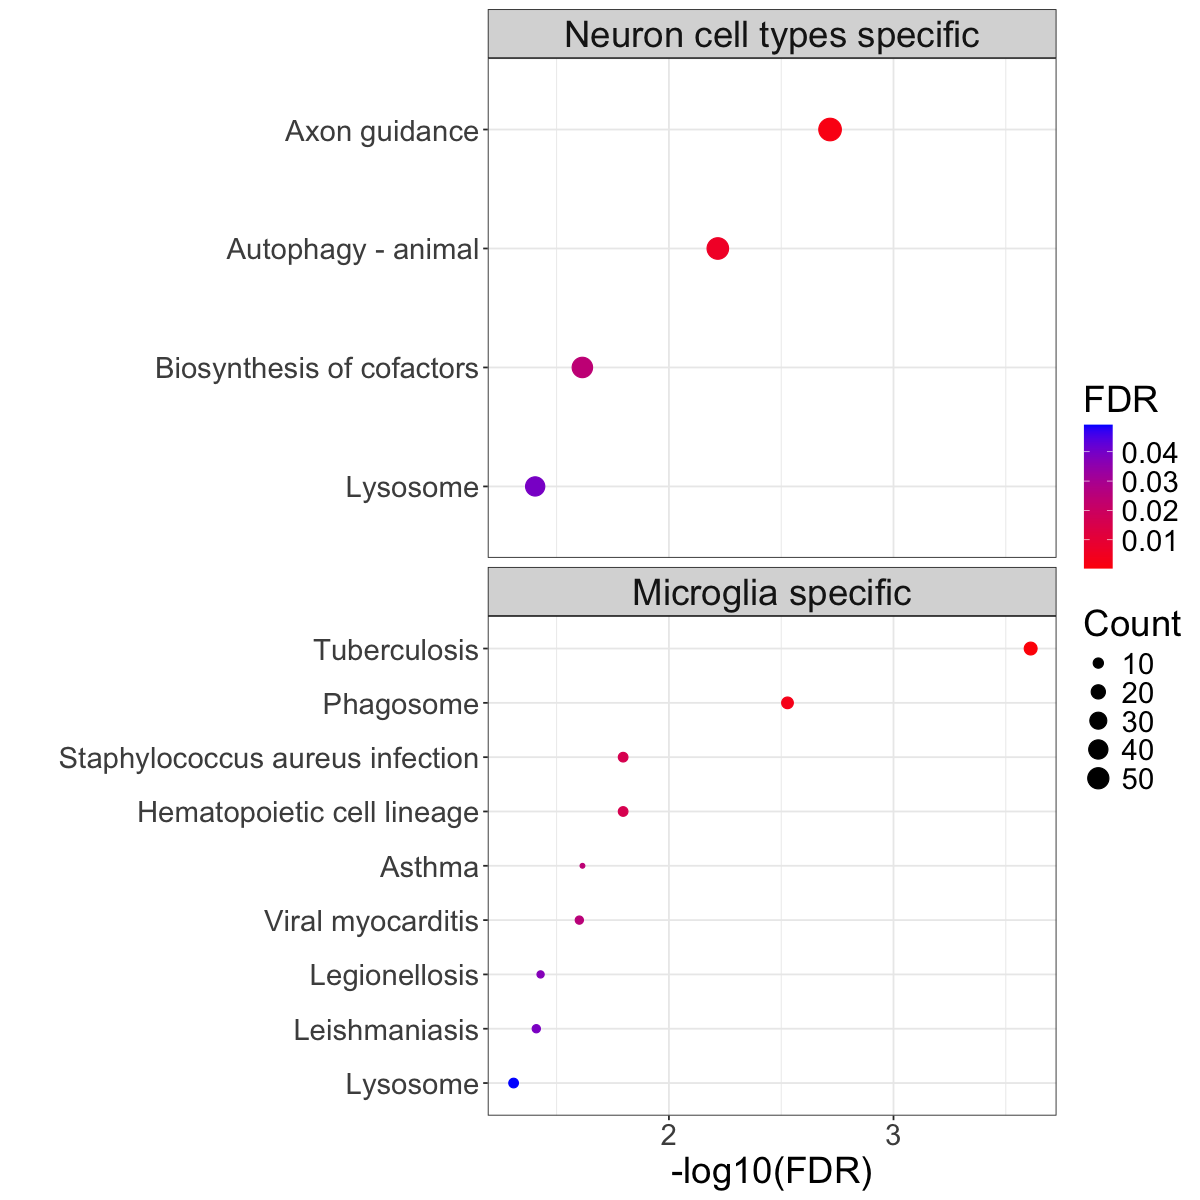

In [9]:
options(repr.plot.width = 10, repr.plot.height = 10)
p1